# Justin Zarkovacki CS-4820
## 9/20/2022

### Required imports

In [1]:
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, AveragePooling2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Rescaling
from keras import Input, models, backend as K

C:\Users\LifeH\anaconda3\envs\AI_FInal_Project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Create Function Definintions and Variables

In [2]:
batch_size = 128
epochs = 12
img_rows, img_cols = 28, 28  # Image dimensions

def load(f):
    return np.load(f)['arr_0']

# Generate a model based on the number of classes in the output layer
def generate_model(num_of_classes, input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid"))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
    model.add(Flatten())
    model.add(Dense(num_of_classes, activation='relu'))
    model.add(Dense(num_of_classes))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer="adam",
                  metrics=['accuracy'])
    
    return model
    
def initialize_data(train_im_file, test_im_file, train_lb_file, test_lb_file):
    train_images = load(train_im_file)
    test_images = load(test_im_file)
    train_labels = load(train_lb_file)
    test_labels = load(test_lb_file)
    
    if K.image_data_format() == 'channels_first':
        train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
        test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
        test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    train_images = train_images.astype('float32')
    test_images = test_images.astype('float32')
    train_images /= 255
    test_images /= 255
    print('{} train samples, {} test samples'.format(len(train_images), len(test_images)))
    
    return tuple([train_images, test_images, train_labels, test_labels, input_shape])

# Helper to create the graphics
def create_visuals(graph_title, model_hist, test_images, test_labels):
    accuracy_data = model_hist.history['accuracy']
    val_accuracy_data = model_hist.history['val_accuracy']

    lower_bound = min(min(accuracy_data), min(val_accuracy_data))

    plt.plot(accuracy_data, label='Train Accuracy')
    plt.plot(val_accuracy_data, label = 'Validation Accuracy')

    plt.title(graph_title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([lower_bound - 0.01, 1])
    plt.legend(loc='lower right')

    print(accuracy_data[-1])
    print(val_accuracy_data[-1])
#     test_loss, test_acc = model_hist.evaluate(test_images, test_labels, verbose=2)

### Initialize training/test datasets and other important variables

In [3]:
prefix = '..\..\Datasets\\'
datasets = {
    "km_tr_i" : prefix + 'Kuzushiji-MNIST - train-imgs.npz',
    "km_te_i" : prefix + 'Kuzushiji-MNIST - test-imgs.npz',
    "km_tr_l" : prefix + 'Kuzushiji-MNIST - train-labels.npz',
    "km_te_l" : prefix + 'Kuzushiji-MNIST - test-labels.npz',
    "k49_tr_i" : prefix + 'Kuzushiji-49 - train-imgs.npz',
    "k49_te_i" : prefix + 'Kuzushiji-49 - test-imgs.npz',
    "k49_tr_l" : prefix + 'Kuzushiji-49 - train-labels.npz',
    "k49_te_l" : prefix + 'Kuzushiji-49 - test-labels.npz',
    "kanji" : prefix + 'midterm_dataset',
}

# Load MNIST Data
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_input_shape = (28, 28, 1)

# Load KMNIST Data
dataset = initialize_data(datasets["km_tr_i"], datasets["km_te_i"], datasets["km_tr_l"], datasets["km_te_l"])
kmnist_train_images = dataset[0]
kmnist_test_images = dataset[1]
kmnist_train_labels = dataset[2]
kmnist_test_labels  = dataset[3]
kmnist_input_shape = dataset[4]

# Load Kuzushiji-49 Data
dataset = initialize_data(datasets["k49_tr_i"], datasets["k49_te_i"], datasets["k49_tr_l"], datasets["k49_te_l"])
k49_train_images = dataset[0]
k49_test_images = dataset[1]
k49_train_labels = dataset[2]
k49_test_labels  = dataset[3]
k49_input_shape = dataset[4]

# Load Kanji Data
kanji_input_shape = (64, 64, 3)
kanji_dataset_train = tf.keras.utils.image_dataset_from_directory(datasets["kanji"], validation_split=0.3,
                        seed=222, subset="training", image_size=(64, 64), batch_size=32)

kanji_dataset_val = tf.keras.utils.image_dataset_from_directory(datasets["kanji"], validation_split=0.3,
                        seed=222, subset="validation", image_size=(64, 64), batch_size=32)

print("Done!")

60000 train samples, 10000 test samples
232365 train samples, 38547 test samples
Found 40857 files belonging to 50 classes.
Using 28600 files for training.
Found 40857 files belonging to 50 classes.
Using 12257 files for validation.
Done!


### Create Model - MNIST

In [10]:
num_classes = 10
mnist_model = generate_model(num_classes, mnist_input_shape)
mnist_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                92170     
                                                      

### Run Model - MNIST

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

mnist_history = mnist_model.fit(mnist_train_images, mnist_train_labels, batch_size=batch_size,
                                epochs=epochs, callbacks=callback, verbose=1,
                                validation_data=(mnist_test_images, mnist_test_labels))

mnist_model.save('justin_mnist_model')

Epoch 1/12
469/469 [==============================] - 70s 148ms/step - loss: 1.8707 - accuracy: 0.3136 - val_loss: 1.5618 - val_accuracy: 0.4043
Epoch 2/12
469/469 [==============================] - 69s 147ms/step - loss: 1.4757 - accuracy: 0.4221 - val_loss: 1.3951 - val_accuracy: 0.4645
Epoch 3/12
469/469 [==============================] - 70s 148ms/step - loss: 1.2457 - accuracy: 0.5022 - val_loss: 1.0924 - val_accuracy: 0.5698
Epoch 4/12
469/469 [==============================] - 71s 150ms/step - loss: 1.0550 - accuracy: 0.5791 - val_loss: 1.0051 - val_accuracy: 0.5934
Epoch 5/12
469/469 [==============================] - 71s 151ms/step - loss: 0.9296 - accuracy: 0.6392 - val_loss: 0.7429 - val_accuracy: 0.7452
Epoch 6/12
469/469 [==============================] - 71s 152ms/step - loss: 0.5862 - accuracy: 0.7947 - val_loss: 0.4806 - val_accuracy: 0.8394
Epoch 7/12
469/469 [==============================] - 73s 156ms/step - loss: 0.3255 - accuracy: 0.9111 - val_loss: 0.1975 - val_ac

### Visualize Results - MNIST

0.9733833074569702
0.968500018119812


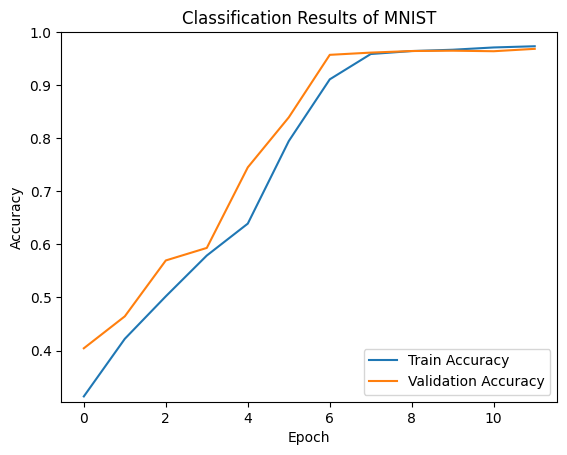

In [12]:
create_visuals("Classification Results of MNIST", mnist_history, mnist_test_images, mnist_test_labels)

### Create Model - KMNIST

In [13]:
num_classes = 10
kmnist_model = generate_model(num_classes, kmnist_input_shape)
kmnist_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_3 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                92170     
                                                      

### Run Model - KMNIST

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

kmnist_history = kmnist_model.fit(kmnist_train_images, kmnist_train_labels, batch_size=batch_size, 
              epochs=epochs, callbacks=callback, verbose=1,
                                  validation_data=(kmnist_test_images, kmnist_test_labels))

kmnist_model.save('justin_kmnist_model')

Epoch 1/12
469/469 [==============================] - 68s 142ms/step - loss: 0.7424 - accuracy: 0.7639 - val_loss: 0.7961 - val_accuracy: 0.7576
Epoch 2/12
469/469 [==============================] - 70s 149ms/step - loss: 0.3116 - accuracy: 0.9096 - val_loss: 0.6608 - val_accuracy: 0.8062
Epoch 3/12
469/469 [==============================] - 71s 151ms/step - loss: 0.2364 - accuracy: 0.9313 - val_loss: 0.5054 - val_accuracy: 0.8551
Epoch 4/12
469/469 [==============================] - 71s 151ms/step - loss: 0.1899 - accuracy: 0.9445 - val_loss: 0.4610 - val_accuracy: 0.8677
Epoch 5/12
469/469 [==============================] - 72s 154ms/step - loss: 0.1562 - accuracy: 0.9548 - val_loss: 0.4264 - val_accuracy: 0.8819
Epoch 6/12
469/469 [==============================] - 74s 158ms/step - loss: 0.1354 - accuracy: 0.9604 - val_loss: 0.3901 - val_accuracy: 0.8904
Epoch 7/12
469/469 [==============================] - 72s 154ms/step - loss: 0.1163 - accuracy: 0.9659 - val_loss: 0.3976 - val_ac

### Visualize Results - KMNIST

0.9821666479110718
0.9092000126838684


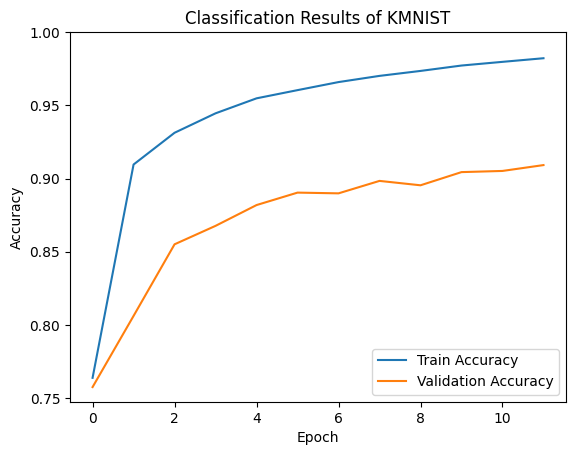

In [18]:
create_visuals("Classification Results of KMNIST", kmnist_history, kmnist_test_images, kmnist_train_labels)

### Create Model - Kuzushiji-49

In [5]:
num_classes = 49
k49_model = generate_model(num_classes, k49_input_shape)
k49_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 64)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 49)                451633    
                                                        

### Run Model - Kuzushiji-49

In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

k49_history = k49_model.fit(k49_train_images, k49_train_labels, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=(k49_test_images, k49_test_labels))

k49_model.save('justin_k49_model')

Epoch 1/12
1816/1816 [==============================] - 562s 309ms/step - loss: 0.7651 - accuracy: 0.8037 - val_loss: 0.7679 - val_accuracy: 0.8040
Epoch 2/12
1816/1816 [==============================] - 588s 324ms/step - loss: 0.3486 - accuracy: 0.9062 - val_loss: 0.5953 - val_accuracy: 0.8491
Epoch 3/12
1816/1816 [==============================] - 542s 299ms/step - loss: 0.2572 - accuracy: 0.9295 - val_loss: 0.5101 - val_accuracy: 0.8702
Epoch 4/12
1816/1816 [==============================] - 508s 280ms/step - loss: 0.2021 - accuracy: 0.9444 - val_loss: 0.4697 - val_accuracy: 0.8830
Epoch 5/12
1816/1816 [==============================] - 450s 248ms/step - loss: 0.1638 - accuracy: 0.9541 - val_loss: 0.4621 - val_accuracy: 0.8883
Epoch 6/12
1816/1816 [==============================] - 448s 247ms/step - loss: 0.1328 - accuracy: 0.9621 - val_loss: 0.4544 - val_accuracy: 0.8927
Epoch 7/12
1816/1816 [==============================] - 448s 247ms/step - loss: 0.1097 - accuracy: 0.9681 - val_

### Vizualize Results - Kuzushiji-49

0.9767478108406067
0.8910939693450928


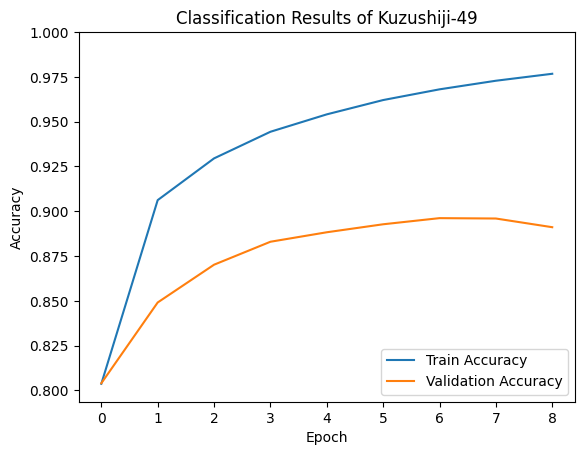

In [7]:
create_visuals("Classification Results of Kuzushiji-49", k49_history, k49_test_images, k49_train_labels)

### Prepare Dataset - Kanji

(32, 64, 64, 3)
(32,)
0.0 1.0


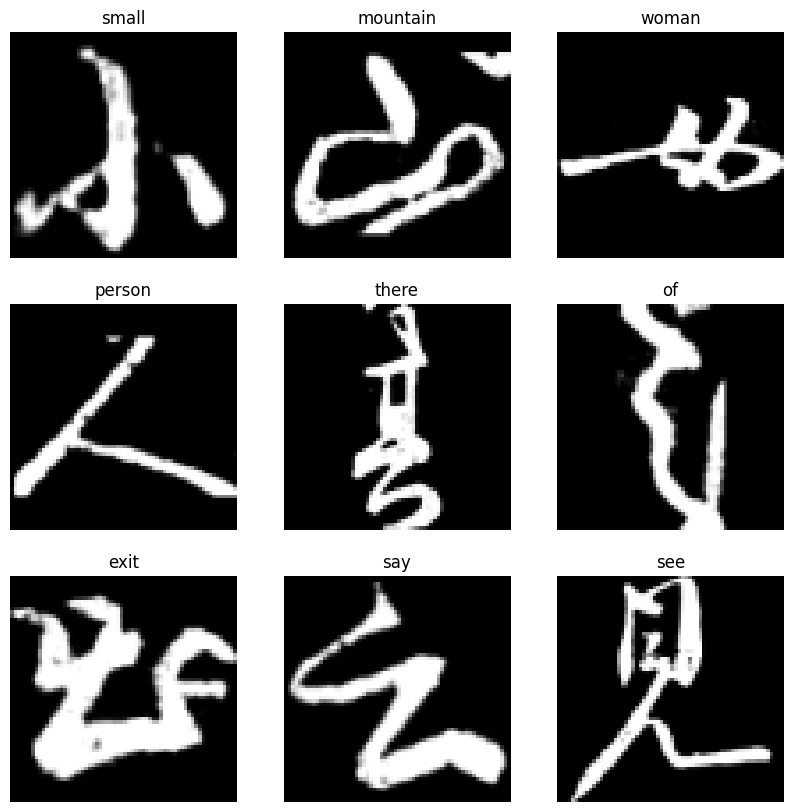

In [8]:
# Load classes
class_names = kanji_dataset_train.class_names

# Show some data to prove load worked
plt.figure(figsize=(10, 10))
for images, labels in kanji_dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in kanji_dataset_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
    
# Rescale Data
normalization_layer = Rescaling(1./255)
normalized_ds = kanji_dataset_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) # Notice the pixel values are now in `[0,1]`.

# Training performane optimizations
AUTOTUNE = tf.data.AUTOTUNE

train_ds = kanji_dataset_train.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = kanji_dataset_val.cache().prefetch(buffer_size=AUTOTUNE)

### Create Model - Kanji

In [9]:
num_classes = 50
kanji_model = generate_model(num_classes, kanji_input_shape)
kanji_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 50)                2880050   
                                                      

### Run Model - Kanji

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

kanji_history = kanji_model.fit(kanji_dataset_train, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=kanji_dataset_val)

kanji_model.save('justin_kanji_model')

Epoch 1/12
894/894 [==============================] - 251s 280ms/step - loss: 2.8717 - accuracy: 0.4728 - val_loss: 1.1666 - val_accuracy: 0.7001
Epoch 2/12
894/894 [==============================] - 256s 286ms/step - loss: 0.6628 - accuracy: 0.8270 - val_loss: 0.6769 - val_accuracy: 0.8254
Epoch 3/12
894/894 [==============================] - 253s 283ms/step - loss: 0.3000 - accuracy: 0.9159 - val_loss: 0.6459 - val_accuracy: 0.8504
Epoch 4/12
894/894 [==============================] - 253s 282ms/step - loss: 0.1613 - accuracy: 0.9542 - val_loss: 0.6918 - val_accuracy: 0.8464
Epoch 5/12
894/894 [==============================] - 255s 285ms/step - loss: 0.1286 - accuracy: 0.9600 - val_loss: 0.8239 - val_accuracy: 0.8486
Epoch 6/12
894/894 [==============================] - 267s 298ms/step - loss: 0.1006 - accuracy: 0.9694 - val_loss: 0.8303 - val_accuracy: 0.8507
INFO:tensorflow:Assets written to: justin_kanji_model\assets


### Visualize Results - Kanji

0.9694405794143677
0.8506975769996643


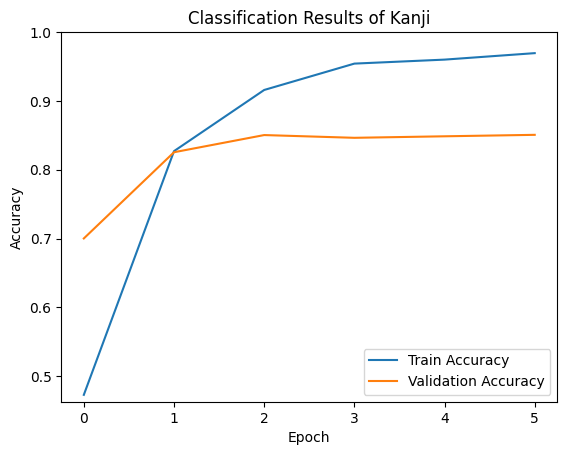

In [11]:
create_visuals("Classification Results of Kanji", kanji_history, kanji_dataset_val, kanji_dataset_val)

## Transfer Learning

### Modifying the Kanji Images

In [12]:
# The original Kanji dataset contains images that are 64x64. Since we are transferring the learning
#   from models that trained on 28x28 images, the Kanji images must be downscaled accordingly.
import os
import random
from skimage.transform import rescale
from skimage import io

def attempt_load(name):
    if os.path.isdir(name):
        return models.load_model(name)
    else:
        print(f"Invalid model name {name}")
        
# Returns a list of the names of the copied directories 
def replicate_folder_structure(original_data, write_path):
    for root, directory, files in os.walk(original_data):
        for direc in directory:
            os.mkdir(write_path + '\\' + direc)

# Scale the image to the desired size
def rescale_image(load_path, save_path, image_scale):
    kanji_char = io.imread(load_path)
    rescaled_image = rescale(kanji_char, image_scale, anti_aliasing=True, clip=True)
    io.imsave(save_path, rescaled_image)

In [ ]:
# NOTE: This code only needs to be run a single time to generate a smaller copy of the original dataset
# image_scale_factor = 28/64
# original_dataset = '..\..\Datasets\\backup_midterm_dataset'
# write_filepath = '..\..\Datasets\\modified_midterm_dataset'

# if not os.path.exists(write_filepath):
#     os.mkdir(write_filepath)
#     replicate_folder_structure(original_dataset, write_filepath)

# # Now resize every image and save it in the new folder
# for directory in os.walk(original_dataset):
#     for file in directory[2]:
#         if file.endswith(".png"):
#             current_dir = directory[0].split('\\')[-1]                      # Find the current directory
#             load_path = directory[0] + '\\' + file                          # Generate load path..
#             save_path = write_filepath + '\\' + current_dir + '\\' + file   # .. and save path with current directory
#             rescale_image(load_path, save_path, image_scale_factor)

### Load the Newly Modified Dataset

In [13]:
prefix = '..\..\Datasets\\'
data_path = prefix + 'modified_midterm_dataset'
mod_size = (28, 28)

modified_kanji_train = tf.keras.utils.image_dataset_from_directory(data_path, validation_split=0.3,
                        seed=222, subset="training", color_mode="grayscale", image_size=mod_size, batch_size=32)

modified_kanji_val = tf.keras.utils.image_dataset_from_directory(data_path, validation_split=0.3,
                        seed=222, subset="validation", color_mode="grayscale", image_size=mod_size, batch_size=32)

print("Done!")

Found 25990 files belonging to 50 classes.
Using 18193 files for training.
Found 25990 files belonging to 50 classes.
Using 7797 files for validation.
Done!


### Load a Base Model and Freeze all Layers

In [14]:
k49_base_model = attempt_load('justin_k49_model')

# Pop the output layer of the previous model 
k49_base_model.pop()
k49_base_model.trainable = False
k49_base_model.save("k49_base_model")

k49_base_model.summary()

INFO:tensorflow:Assets written to: k49_base_model\assets
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 64)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 49)                451633    

### Create a Top Model on Your Base

In [18]:
tl_model = Sequential()
tl_model.add(k49_base_model)
tl_model.add(Dense(50))

tl_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 49)                470449    
                                                                 
 dense_5 (Dense)             (None, 50)                2500      
                                                                 
Total params: 472,949
Trainable params: 2,500
Non-trainable params: 470,449
_________________________________________________________________


### Train the Top Model

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tl_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer="adam",
                  metrics=['accuracy'])

result = tl_model.fit(modified_kanji_train, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=modified_kanji_val)

Epoch 1/12
569/569 [==============================] - 19s 33ms/step - loss: 765.7041 - accuracy: 0.3934 - val_loss: 181.2050 - val_accuracy: 0.6520
Epoch 2/12
569/569 [==============================] - 20s 36ms/step - loss: 119.7445 - accuracy: 0.7390 - val_loss: 77.7347 - val_accuracy: 0.7953
Epoch 3/12
569/569 [==============================] - 21s 37ms/step - loss: 63.8033 - accuracy: 0.8212 - val_loss: 51.6366 - val_accuracy: 0.8407
Epoch 4/12
569/569 [==============================] - 21s 37ms/step - loss: 45.5256 - accuracy: 0.8557 - val_loss: 40.7861 - val_accuracy: 0.8619
Epoch 5/12
569/569 [==============================] - 21s 36ms/step - loss: 36.0039 - accuracy: 0.8673 - val_loss: 35.5603 - val_accuracy: 0.8651
Epoch 6/12
569/569 [==============================] - 21s 37ms/step - loss: 31.9789 - accuracy: 0.8720 - val_loss: 30.7821 - val_accuracy: 0.8748
Epoch 7/12
569/569 [==============================] - 21s 37ms/step - loss: 28.7383 - accuracy: 0.8708 - val_loss: 30.272

0.8702797889709473
0.8755931854248047


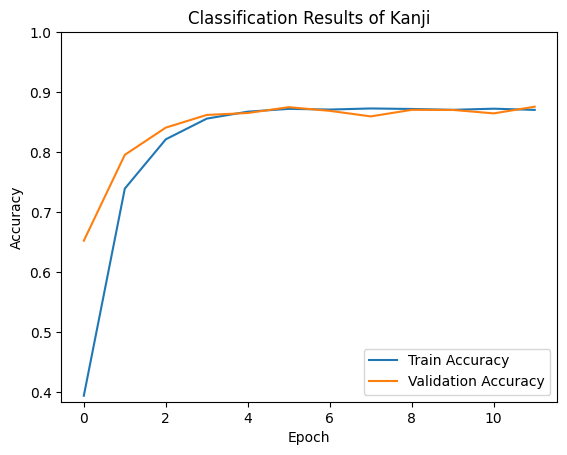

In [20]:
create_visuals("Classification Results of Kanji", result, kanji_dataset_val, kanji_dataset_val)

### Testing